In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the dataset
df = pd.read_csv('dataFrame.csv')

In [ ]:
# Displayed the first few rows of dataset
print("London Stock Exchage Dataset:")
print(df.head())


London Stock Exchage Dataset:
                    Unnamed: 0                         Sector  \
0                      1PM PLC             Financial Services   
1                 1SPATIAL PLC               Support Services   
2  21ST CENTURY TECHNOLOGY PLC               Support Services   
3                 3I GROUP PLC             Financial Services   
4        3I INFRASTRUCTURE PLC  Equity Investment Instruments   

                       Subsector  Market Cap (£ m)  \
0              Specialty Finance             35.91   
1      Business Support Services             34.06   
2      Business Support Services              2.75   
3              Specialty Finance           7524.93   
4  Equity Investment Instruments           2094.97   

   Current Price per Share (pence)  Net Asset Value per Share (pence)  \
0                            41.50                              22.92   
1                            34.50                              -0.49   
2                             2.95 

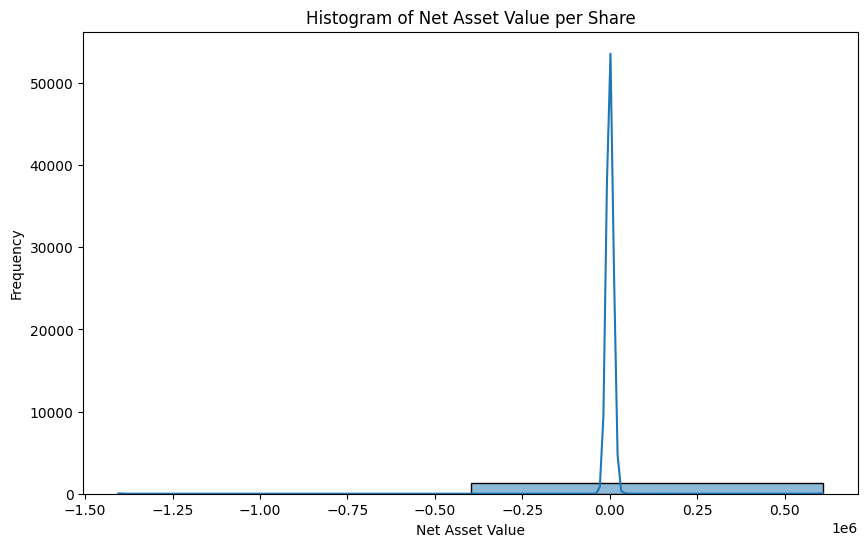

In [ ]:
# Distribution of Net Asset Value per Share
plt.figure(figsize=(10, 6))
sns.histplot(df['Net Asset Value per Share (pence)'], kde=True, bins=2)
plt.title('Histogram of Net Asset Value per Share')
plt.xlabel('Net Asset Value')
plt.ylabel('Frequency')
plt.show()

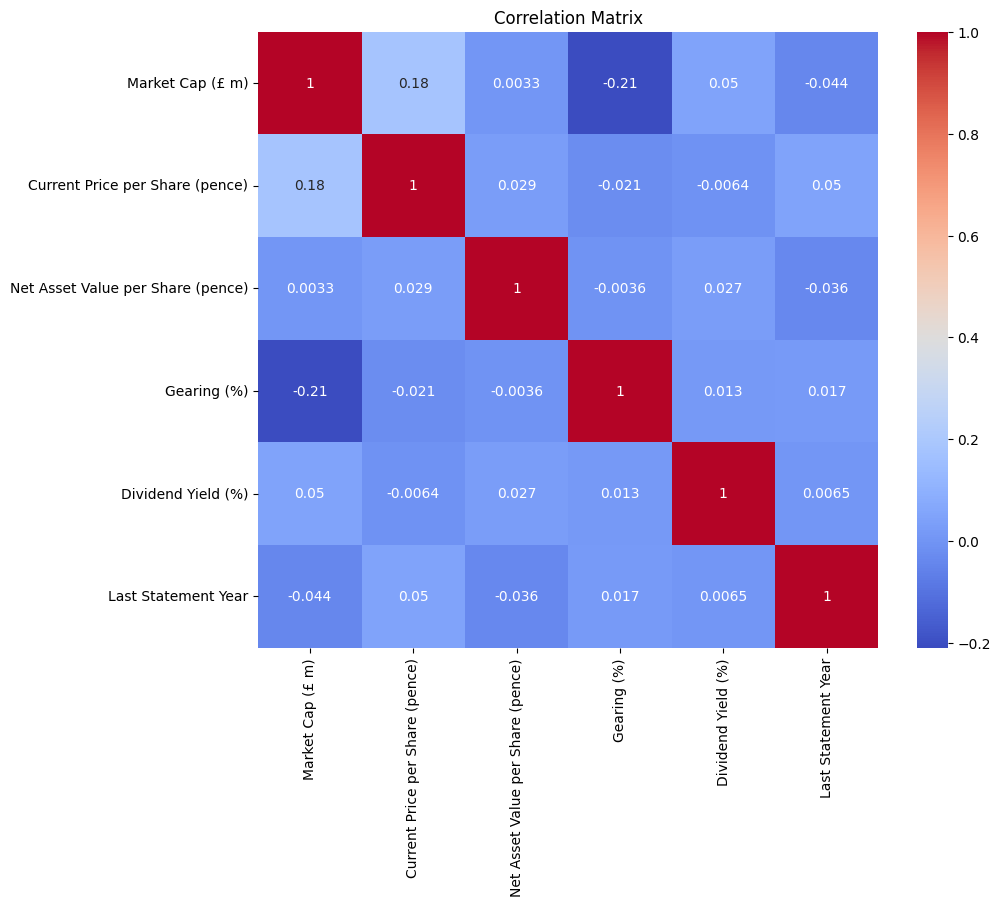

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 8))
# Selected only numeric columns for correlation calculation
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         1548 non-null   object 
 1   Sector                             1548 non-null   object 
 2   Subsector                          1548 non-null   object 
 3   Market Cap (£ m)                   1548 non-null   float64
 4   Current Price per Share (pence)    1546 non-null   float64
 5   Net Asset Value per Share (pence)  1347 non-null   float64
 6   Gearing (%)                        735 non-null    float64
 7   Dividend Yield (%)                 791 non-null    float64
 8   Last Statement Year                1500 non-null   float64
dtypes: float64(6), object(3)
memory usage: 109.0+ KB
None


In [ ]:
print(df.isnull().sum())

Unnamed: 0                             1
Sector                                 1
Subsector                              1
Market Cap (£ m)                       1
Current Price per Share (pence)        3
Net Asset Value per Share (pence)    202
Gearing (%)                          814
Dividend Yield (%)                   758
Last Statement Year                   49
dtype: int64


In [ ]:
# Filled missing values in numerical columns only
for column in df.select_dtypes(include=['number']):
    df[column].fillna(df[column].mean(), inplace=True)

In [ ]:
# Converted relevant columns to numeric type
for column in df.select_dtypes(include=['object']): # Check object type columns
    try:
        df[column] = pd.to_numeric(df[column], errors='coerce')
        # Convert to numeric, replace non-convertibles with NaN
    except ValueError:
        print(f"Column '{column}' could not be converted to numeric. It might contain non-numeric values.")

# Fill missing values in numerical columns
for column in df.select_dtypes(include=['number']):
    df[column].fillna(df[column].mean(), inplace=True)

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
# Normalize or standardize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Verify the correct column names in  DataFrame
print(df.columns)

# Automatically selected numerical columns
numerical_features = df.select_dtypes(include=['number']).columns

# Appllied scaling to the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

Index(['Unnamed: 0', 'Sector', 'Subsector', 'Market Cap (£ m)',
       'Current Price per Share (pence)', 'Net Asset Value per Share (pence)',
       'Gearing (%)', 'Dividend Yield (%)', 'Last Statement Year'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
<ipython-input-28-765005a36614>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [ ]:
# Verify preprocessing steps
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 813 entries, 0 to 1548
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         0 non-null      float64
 1   Sector                             0 non-null      float64
 2   Subsector                          0 non-null      float64
 3   Market Cap (£ m)                   813 non-null    float64
 4   Current Price per Share (pence)    813 non-null    float64
 5   Net Asset Value per Share (pence)  813 non-null    float64
 6   Gearing (%)                        813 non-null    float64
 7   Dividend Yield (%)                 813 non-null    float64
 8   Last Statement Year                813 non-null    float64
dtypes: float64(9)
memory usage: 63.5 KB
None


In [ ]:
print(df.head())

   Unnamed: 0  Sector  Subsector  Market Cap (£ m)  \
0         NaN     NaN        NaN         -0.490715   
1         NaN     NaN        NaN         -0.497247   
5         NaN     NaN        NaN         -0.375287   
7         NaN     NaN        NaN         -0.557662   
8         NaN     NaN        NaN         -0.590677   

   Current Price per Share (pence)  Net Asset Value per Share (pence)  \
0                        -0.461221                          -0.272818   
1                        -0.507839                          -0.600732   
5                        -0.045985                           0.965160   
7                        -0.636039                          -0.128821   
8                        -0.724947                          -0.592888   

   Gearing (%)  Dividend Yield (%)  Last Statement Year  
0     0.603389           -2.078530             1.244543  
1     0.183403            0.580959             1.244543  
5    -0.463494            0.580959            -0.585138  
7   

In [ ]:
#Save the preprocessed dataset to a new CSV file
df.to_csv('preprocessed_london_stock_exchange.csv', index=False)

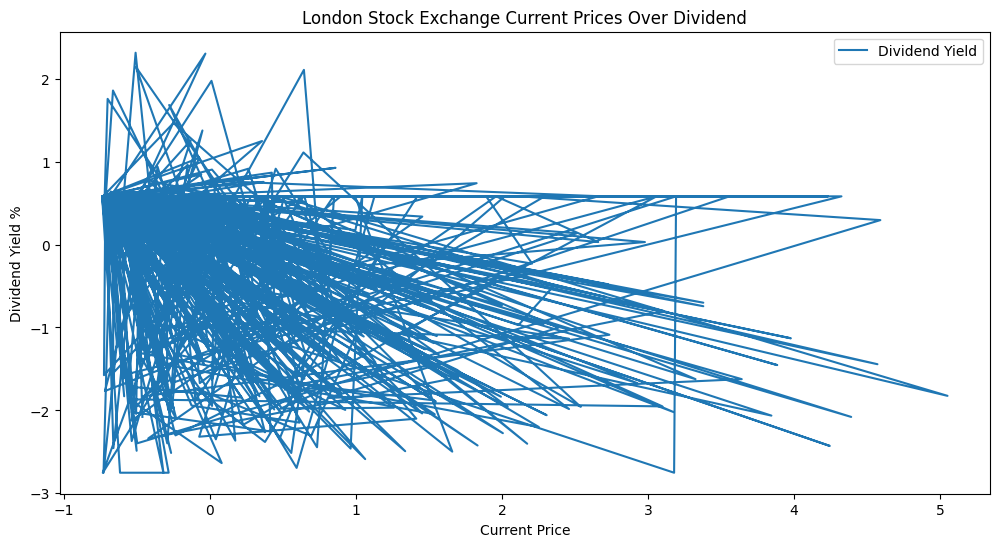

In [ ]:
#Line Plot of Current Prices Over Dividend
plt.figure(figsize=(12, 6))
plt.plot(df['Current Price per Share (pence)'], df['Dividend Yield (%)'], label='Dividend Yield')
plt.xlabel('Current Price')
plt.ylabel('Dividend Yield %')
plt.title('London Stock Exchange Current Prices Over Dividend')
plt.legend()
plt.show()

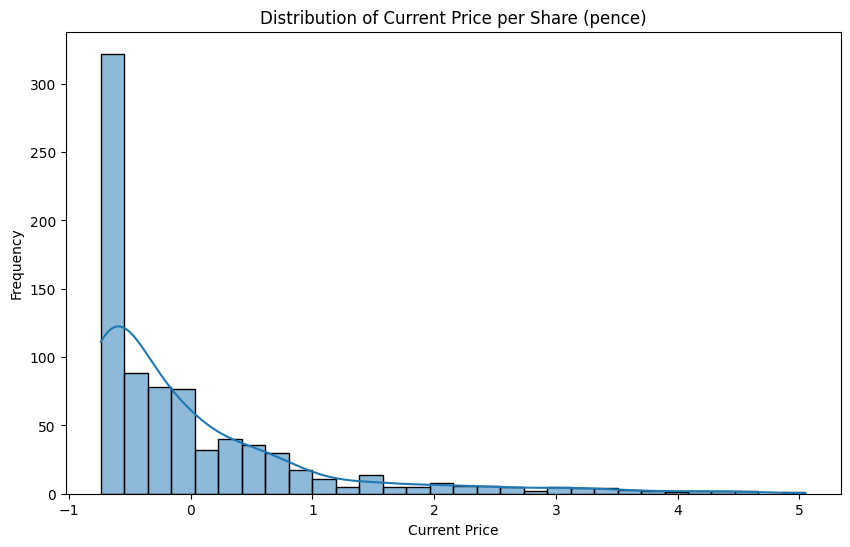

In [ ]:
# 2. Distribution of Current Price per Share (pence)
plt.figure(figsize=(10, 6))
sns.histplot(df['Current Price per Share (pence)'], kde=True, bins=30)
plt.title('Distribution of Current Price per Share (pence)')
plt.xlabel('Current Price')
plt.ylabel('Frequency')
plt.show()

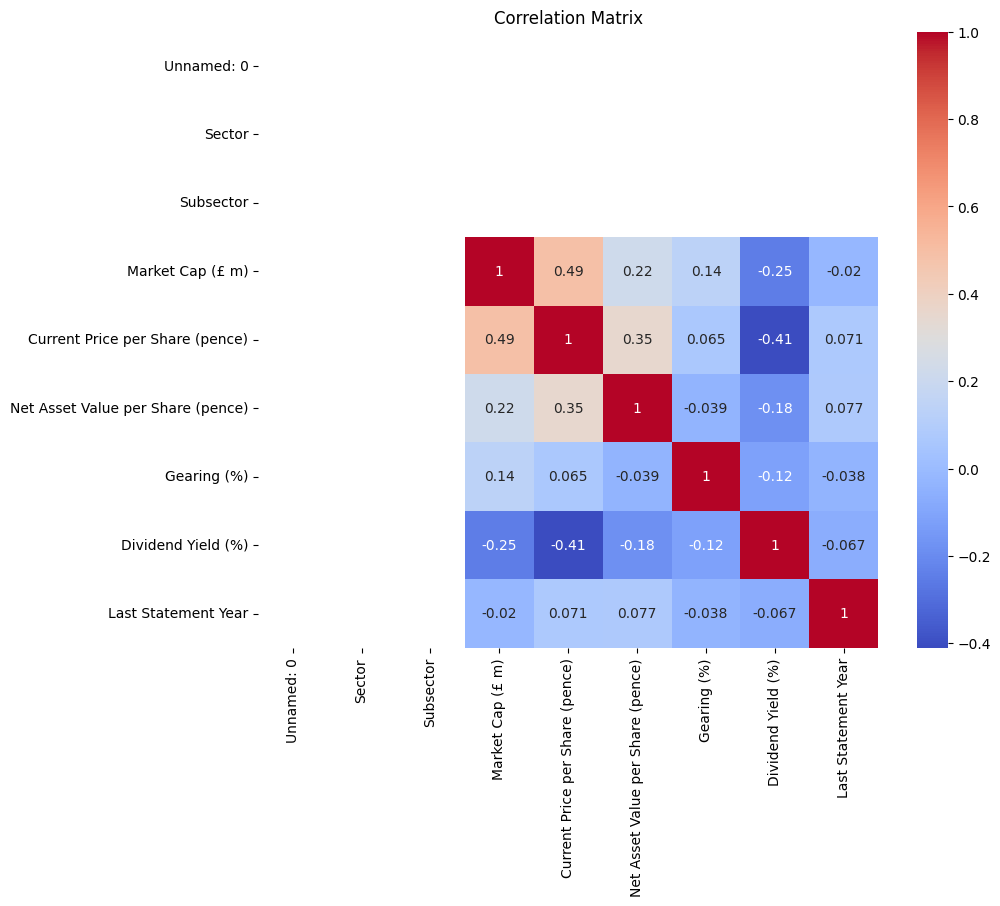

In [ ]:
# 3. Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df = pd.read_csv('/content/preprocessed_london_stock_exchange.csv')

In [ ]:
print(df.head())

   Unnamed: 0  Sector  Subsector  Market Cap (£ m)  \
0         NaN     NaN        NaN         -0.490715   
1         NaN     NaN        NaN         -0.497247   
2         NaN     NaN        NaN         -0.375287   
3         NaN     NaN        NaN         -0.557662   
4         NaN     NaN        NaN         -0.590677   

   Current Price per Share (pence)  Net Asset Value per Share (pence)  \
0                        -0.461221                          -0.272818   
1                        -0.507839                          -0.600732   
2                        -0.045985                           0.965160   
3                        -0.636039                          -0.128821   
4                        -0.724947                          -0.592888   

   Gearing (%)  Dividend Yield (%)  Last Statement Year  
0     0.603389           -2.078530             1.244543  
1     0.183403            0.580959             1.244543  
2    -0.463494            0.580959            -0.585138  
3   

In [ ]:
# Check for missing values
print(df.isnull().sum())


Unnamed: 0                           813
Sector                               813
Subsector                            813
Market Cap (£ m)                       0
Current Price per Share (pence)        0
Net Asset Value per Share (pence)      0
Gearing (%)                            0
Dividend Yield (%)                     0
Last Statement Year                    0
dtype: int64


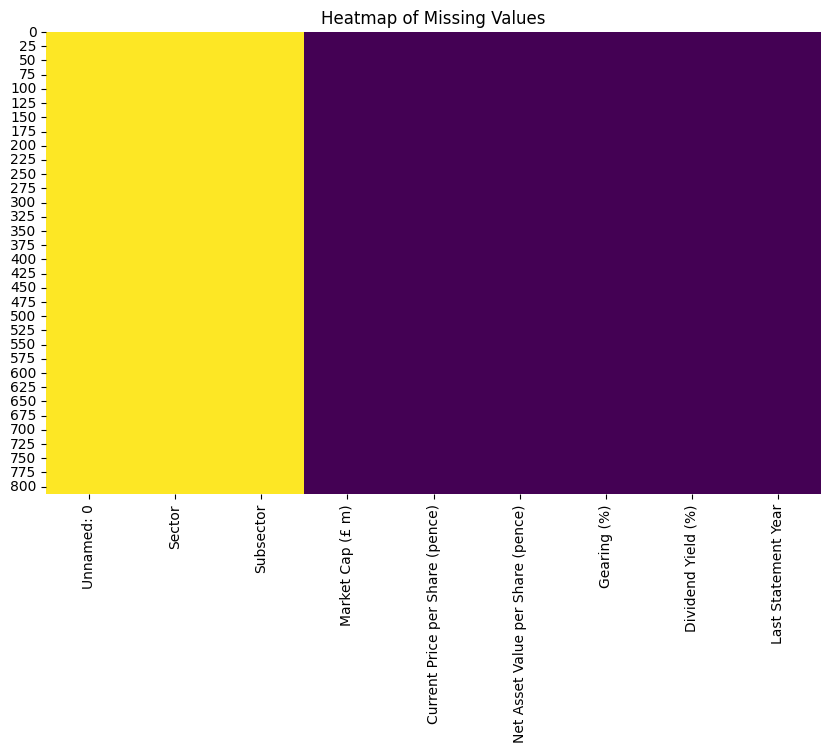

In [ ]:
# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

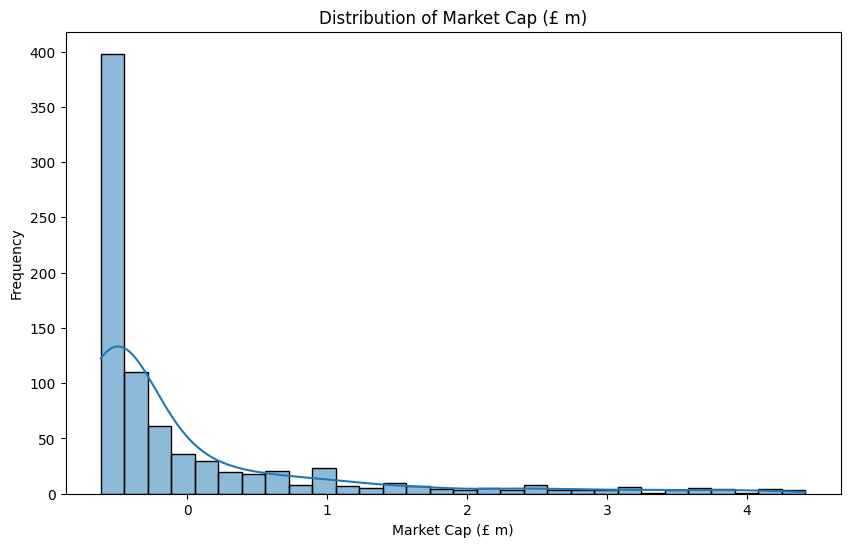

In [ ]:
# Distribution plot for Market Cap (£ m)
plt.figure(figsize=(10, 6))
sns.histplot(df['Market Cap (£ m)'], kde=True, bins=30)
plt.title('Distribution of Market Cap (£ m)')
plt.xlabel('Market Cap (£ m)')
plt.ylabel('Frequency')
plt.show()


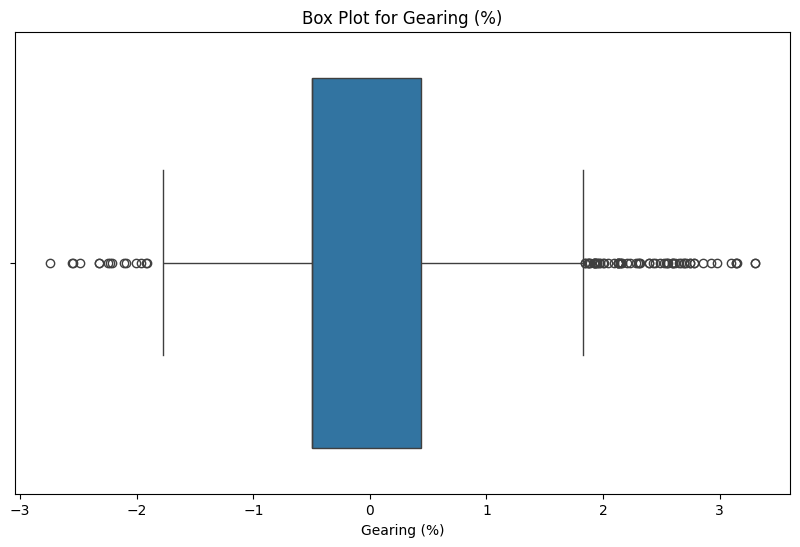

In [ ]:
# Box plot for Gearing (%)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Gearing (%)'])
plt.title('Box Plot for Gearing (%)')
plt.xlabel('Gearing (%)')
plt.show()


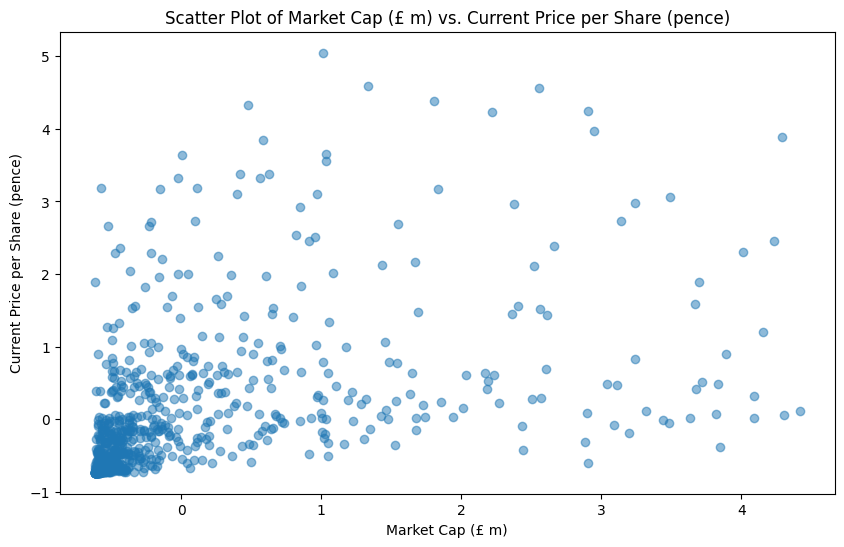

In [ ]:
# Scatter plot between Market Cap (£ m) and Current Price per Share (pence)
plt.figure(figsize=(10, 6))
plt.scatter(df['Market Cap (£ m)'], df['Current Price per Share (pence)'], alpha=0.5)
plt.xlabel('Market Cap (£ m)')
plt.ylabel('Current Price per Share (pence)')
plt.title('Scatter Plot of Market Cap (£ m) vs. Current Price per Share (pence)')
plt.show()


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score


In [ ]:
# Loaded the cleaned dataset
df = pd.read_csv('preprocessed_london_stock_exchange.csv')

# Defined the features (X) and the target variable (y)
X = df.drop(columns=['Current Price per Share (pence)'])  # Features
y = df['Current Price per Share (pence)']  # Target


In [ ]:
# Handled categorical variables using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Splited the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fill missing values (NaN) with the mean of each column
for column in X_train.columns:
    if X_train[column].isnull().all():
        X_train[column].fillna(0, inplace=True)  # Fill with 0 or another suitable value
    else:
        X_train[column].fillna(X_train[column].mean(), inplace=True)

# Apply the same imputation to the test set
for column in X_test.columns:
    if X_test[column].isnull().all():
        X_test[column].fillna(0, inplace=True)  # Fill with 0 or another suitable value
    else:
        X_test[column].fillna(X_test[column].mean(), inplace=True)

# Normalize/Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
# Initialize and train a Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr:.2f}")
print(f"Linear Regression R2: {r2_lr:.2f}")

Linear Regression MSE: 0.66
Linear Regression R2: 0.35


In [ ]:
# Initialize and train a Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree MSE: {mse_dt:.2f}")
print(f"Decision Tree R2: {r2_dt:.2f}")


Decision Tree MSE: 1.01
Decision Tree R2: 0.01


In [ ]:
# Initialize and train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf:.2f}")
print(f"Random Forest R2: {r2_rf:.2f}")


Random Forest MSE: 0.54
Random Forest R2: 0.47


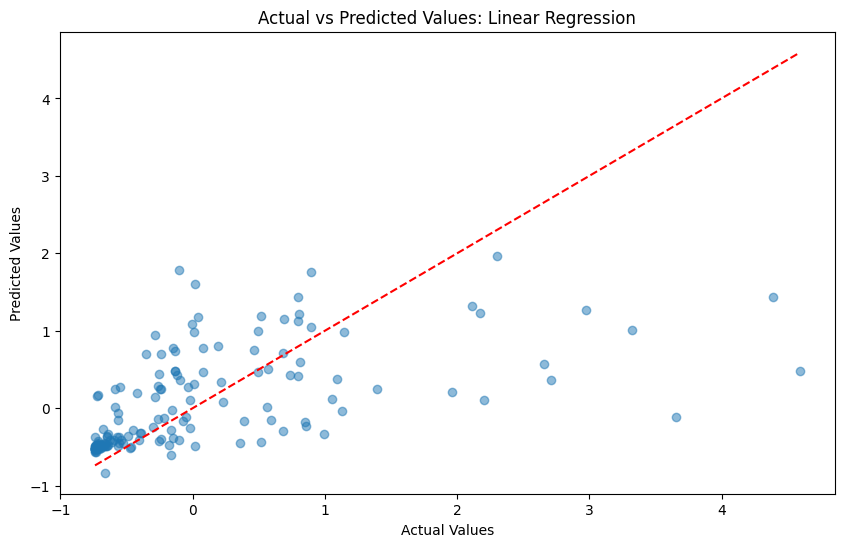

In [ ]:
# Plotting function for predicted vs actual values
def plot_predicted_vs_actual(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted Values: {model_name}')
    plt.show()

# Plot for Linear Regression
plot_predicted_vs_actual(y_test, y_pred_lr, 'Linear Regression')



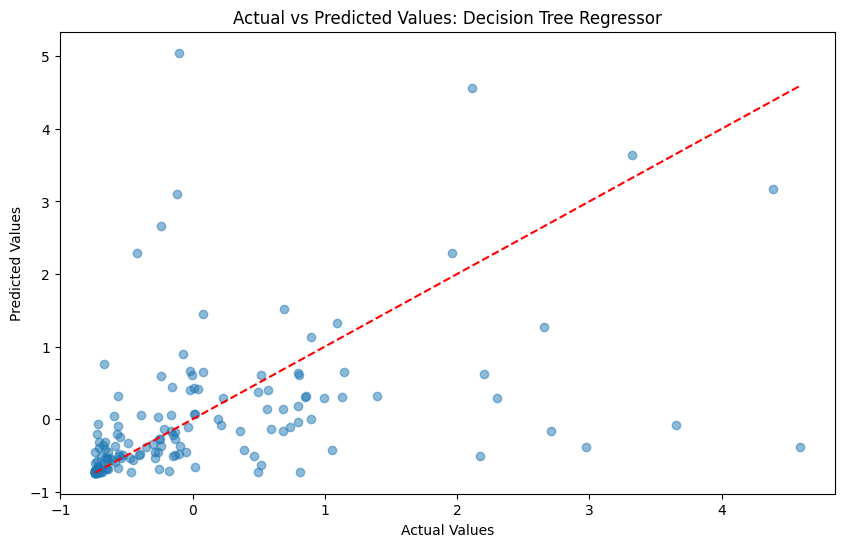

In [ ]:
# Plot for Decision Tree Regressor
plot_predicted_vs_actual(y_test, y_pred_dt, 'Decision Tree Regressor')


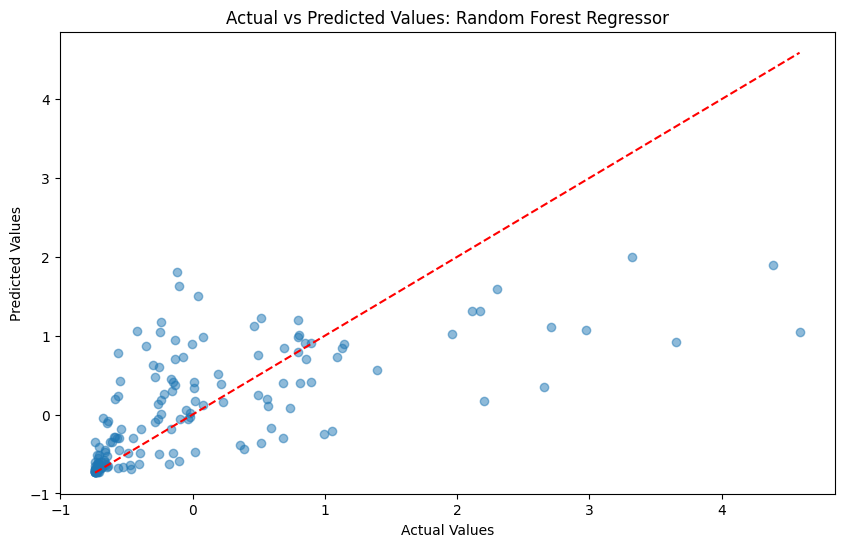

In [ ]:

# Plot for Random Forest Regressor
plot_predicted_vs_actual(y_test, y_pred_rf, 'Random Forest Regressor')

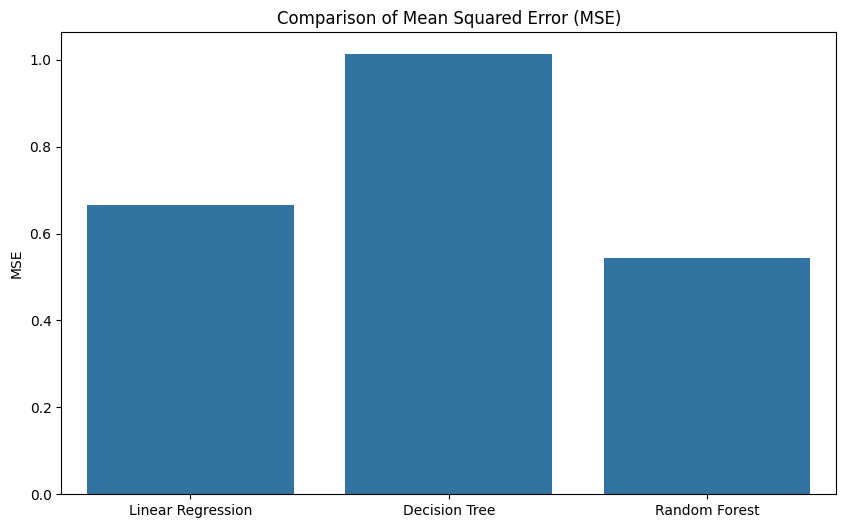

In [ ]:
# Bar plot to compare MSE of the models
mse_scores = [mse_lr, mse_dt, mse_rf]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest']

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=mse_scores)
plt.title('Comparison of Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.show()


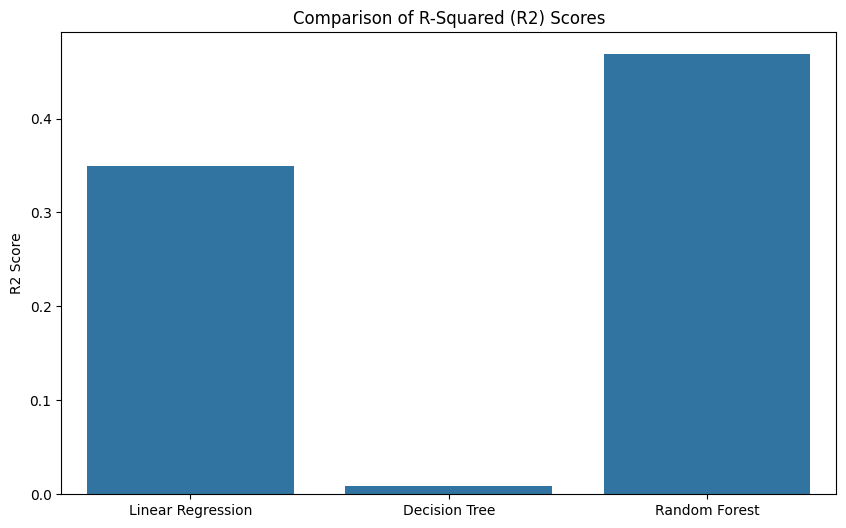

In [ ]:
# Bar plot to compare R2 Scores of the models
r2_scores = [r2_lr, r2_dt, r2_rf]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=r2_scores)
plt.title('Comparison of R-Squared (R2) Scores')
plt.ylabel('R2 Score')
plt.show()
